In [72]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Input
from scipy.signal import sawtooth

In [3]:
tf.config.set_visible_devices([], 'GPU')  # Отключаем GPU

✅ CSV file 'ekg_signal.csv' saved successfully!


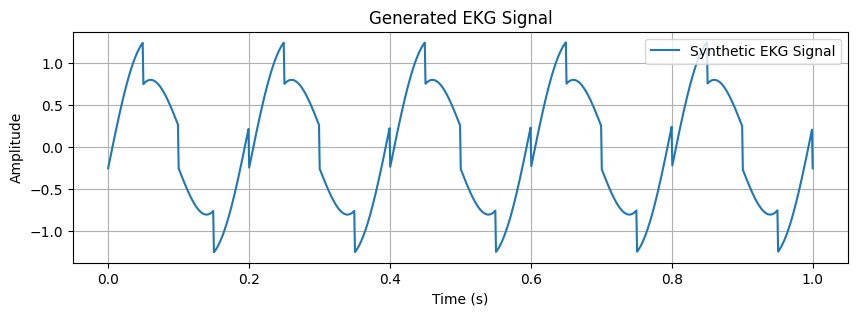

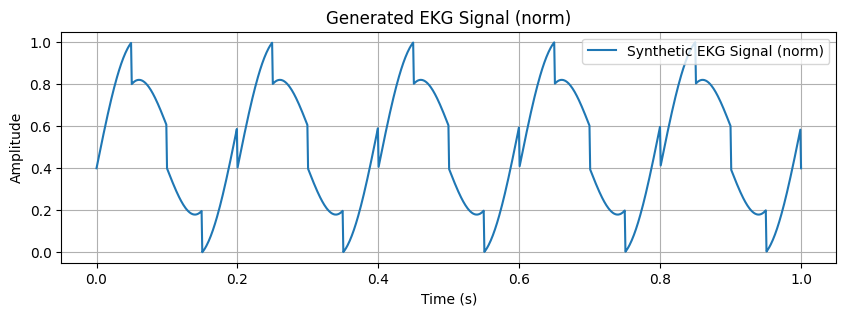

In [73]:
# 🔹 Генерация синтетического ЭКГ-сигнала
t = np.linspace(0, 1, 1000)  # 1 секунда, 1000 точек
ekg_signal = np.sin(2 * np.pi * 5 * t) + 0.25 * sawtooth(2 * np.pi * 20 * t)  # Имитация сердечного ритма
# ✅ Создаем DataFrame
df = pd.DataFrame({"Time (s)": t, "EKG Signal": ekg_signal})

# ✅ Сохраняем в CSV
df.to_csv("ekg_signal.csv", index=False)

print("✅ CSV file 'ekg_signal.csv' saved successfully!")
plt.figure(figsize=(10, 3))
plt.plot(t, ekg_signal, label="Synthetic EKG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Generated EKG Signal")
plt.legend()
plt.grid(True)
plt.show()

# 🔹 Нормализация данных
ekg_signal = (ekg_signal - np.min(ekg_signal)) / (np.max(ekg_signal) - np.min(ekg_signal))  # [0, 1]
ekg_signal = ekg_signal.reshape(1, 1000, 1)  # Формат для CNN: (batch, timesteps, channels)

# 🔹 Визуализация
plt.figure(figsize=(10, 3))
plt.plot(t, ekg_signal[0], label="Synthetic EKG Signal (norm)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Generated EKG Signal (norm)")
plt.legend()
plt.grid(True)
plt.show()

1. Что делает свёрточный слой (Conv1D)?
Свёрточный слой (Conv1D) выполняет свёртку входного сигнала с помощью набора фильтров (или ядер).

🔹 Основные цели свёрточного слоя:

Выявлять локальные закономерности в данных (например, повторяющиеся паттерны в ЭКГ).
Сократить размерность сигнала, сохраняя важные особенности.
📌 Как работает свёртка?

У нас 16 фильтров, каждый из которых имеет размер 5 (ядро 5 точек).
Фильтр скользит по сигналу и вычисляет сумму свёртки между входным сигналом и весами фильтра.
Получаем новый представленный сигнал (активацию).
🔹 Пример: Если фильтр обнаруживает резкие пики (например, зубцы QRS на ЭКГ), он будет давать большие активации в этих местах.


Conv1D(filters=16, kernel_size=5, activation="relu", input_shape=(1000, 1))
filters=16 → 16 разных фильтров, изучающих разные закономерности.
kernel_size=5 → Длина каждого фильтра = 5 точек.
activation="relu" → Применяем функцию ReLU, чтобы сохранить только положительные активации.
input_shape=(1000, 1) → Вход: сигнал длиной 1000 точек и 1 канал (1D-сигнал).


2. Что делает Flatten()?
Свёрточные слои генерируют многомерные представления данных.
Но полносвязные (Dense) слои работают только с векторами.

Flatten() разворачивает 2D-тензор в 1D-вектор перед передачей в Dense.

3. Почему выходной слой Dense(1, activation="linear")?
Выходной слой — единственный нейрон (скаляр), потому что мы пытаемся воспроизвести сигнал.

Если бы мы решали задачу классификации, использовали бы softmax.
Если бы задача требовала положительных значений, выбрали бы ReLU.
Здесь же нужен неизмененный сигнал, поэтому активация "linear" (выход без ограничений).
4. Что такое свёрточные фильтры?
Фильтры — это набор весов, которые обучаются выявлять особенности сигнала.
После обучения можно посмотреть коэффициенты этих фильтров:

python
Kopieren
Bearbeiten
filters → матрица весов для 16 фильтров.
biases → сдвиги (bias) для каждого фильтра.
🔹 Зачем фильтры?

Один фильтр может реагировать на острые пики.
Другой — выделять медленные волны.
Третий — находить ритмичность.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step - loss: 0.0815
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2882
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1496
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0816
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0817
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0817
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0817
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0817
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0817
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0817
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0817
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0817
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0817
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0817
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.

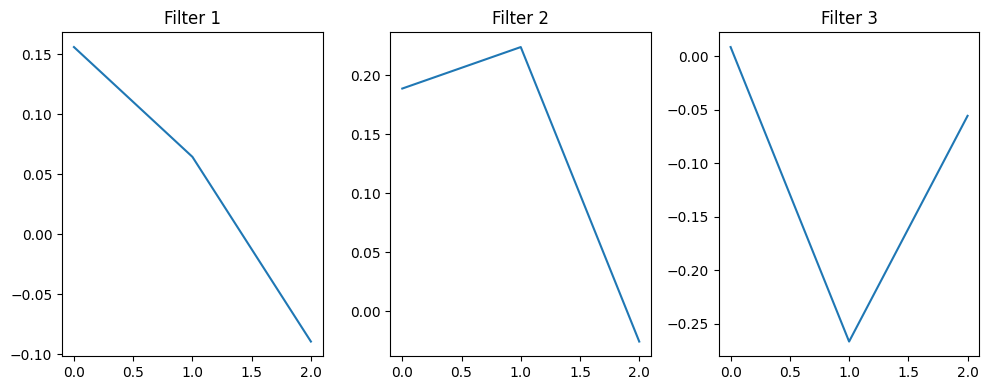

In [57]:
# 🔹 Создаем модель CNN для анализа ЭКГ
# model = Sequential([
#     Conv1D(filters=16, kernel_size=5, activation="relu", input_shape=(1000, 1)),  # Свёрточный слой Свёрточный слой (Conv1D) выполняет свёртку входного сигнала с помощью набора фильтров (или ядер).
#                                                                                 # Основные цели свёрточного слоя:
#                                                                                 # Выявлять локальные закономерности в данных (например, повторяющиеся паттерны в ЭКГ).
#                                                                                 # Сократить размерность сигнала, сохраняя важные особенности.
#     Flatten(),  # Преобразуем в вектор
#     Dense(1, activation="linear")  # Линейный выход
# ])

model = Sequential([
    Input(shape=(1000, 1)),   # <-- Важно! Явно задаём входной размер
    Conv1D(16, kernel_size=3, activation="relu",name="conv1"),
    Flatten(),
    Dense(10, activation="relu"),
    Dense(1, activation="sigmoid")
])

# 🔹 Прогоняем данные через модель, чтобы инициализировать input
model.build(input_shape=(None, 1000, 1))  # Задаем форму входных данных
_ = model.predict(ekg_signal)  # Прогоняем случайный сигнал, чтобы активировать слои

# 🔹 Компиляция модели
model.compile(optimizer="adam", loss="mse")

# 🔹 Обучение модели (на искусственных данных)
X_train = ekg_signal  # Входные данные
Y_train = ekg_signal  # Просто учимся воспроизводить сигнал (autoencoder)
model.fit(X_train, Y_train, epochs=20, verbose=1)

# 🔹 Получаем свёрточные фильтры
filters, biases = model.layers[0].get_weights()

# 🔹 Визуализация 3 первых фильтров  Каждая кривая — это веса одного фильтра.
# Если фильтр реагирует на пики, его график покажет активации в местах R-зубцов ЭКГ.
# Если фильтр реагирует на шум, он выделит высокочастотные колебания.
# Если фильтр реагирует на тренды, он покажет медленные изменения сигнала.
# 📌 Итог
# CNN анализирует локальные особенности сигнала, выявляя ритм, пики, шум и другие паттерны.
# Эта модель похожа на автоэнкодер, который учится восстанавливать входной сигнал. 🚀
plt.figure(figsize=(10, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.plot(filters[:, :, i])
    plt.title(f"Filter {i+1}")
plt.tight_layout()
plt.show()

In [64]:
model.layers[0].output


<KerasTensor shape=(None, 998, 16), dtype=float32, sparse=False, name=keras_tensor_176>


In [65]:
model.inputs

[<KerasTensor shape=(None, 1000, 1), dtype=float32, sparse=False, name=keras_tensor_175>]

На данном графике изображены фильтры первого свёрточного слоя из модели, то есть их веса.

Что представляют эти графики?
Каждая из трёх панелей (Filter 1, Filter 2, Filter 3) показывает весовые коэффициенты для отдельных фильтров (ядра свёртки).
Ось X — это позиции в ядре фильтра (индексы от 0 до 4, так как длина ядра kernel_size=5).
Ось Y — значения весов фильтров.
Как интерпретировать?
Эти веса определяют, какой паттерн в сигнале фильтр выделяет.
Например:
Filter 1 реагирует на восходящий тренд (веса сначала отрицательные, потом положительные).
Filter 2 имеет пик в центре ядра, что позволяет выделить резкие изменения сигнала.
Filter 3 обнаруживает более сложный паттерн: спад, подъём, а затем снова спад.
Почему это важно?
Фильтры автоматически обучаются распознавать ключевые особенности сигнала:

Например, на синтетическом ЭКГ это могут быть пики, падения, изменения формы волн.
Каждый фильтр специализируется на разных частях сигнала.
Эти фильтры затем применяются к данным, чтобы извлечь полезные признаки для дальнейшей обработки.

In [21]:
from tensorflow.keras.models import Model

Мы берём уже обученную модель model.
🔹 Создаём новую модель conv_layer_model, которая возвращает выход первого (свёрточного) слоя.
🔹 Теперь мы можем получить выходные карты признаков (активации) свёрточного слоя.

 Что здесь происходит?
🔹 Мы строим 3 графика, каждый из которых показывает активацию отдельного свёрточного фильтра.
🔹 conv_output[0, :, i] — это выход i-го фильтра.
🔹 Если на графиках видны пики и паттерны, значит CNN нашла ключевые особенности ЭКГ (например, QRS-комплексы).



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


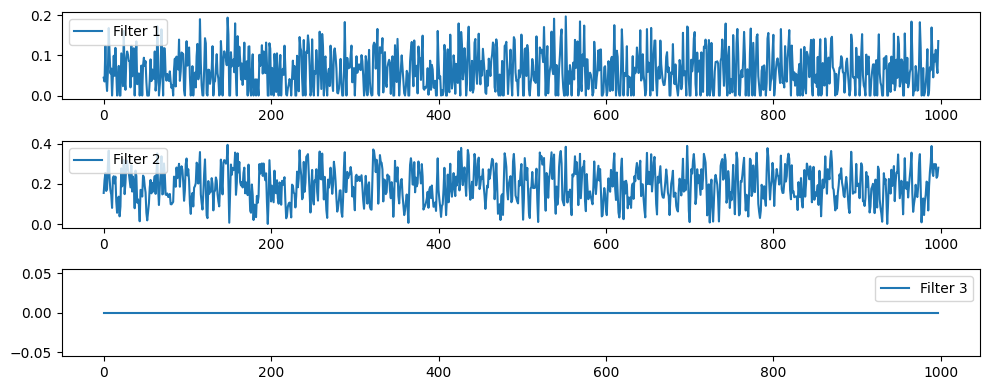

In [70]:
# 🔹 Прогоняем данные через модель, чтобы инициализировать input
_ = model.predict(ekg_signal)
# ✅ Создаем модель, которая возвращает выход первого свёрточного слоя
conv_layer_model = Model(inputs=model.inputs, outputs=model.get_layer("conv1").output)

# 🔹 Прогоняем сигнал через свёрточный слой
conv_output = conv_layer_model.predict(ekg_signal)

# 🔹 Визуализируем первые 3 фильтра
plt.figure(figsize=(10, 4))
for i in range(min(3, conv_output.shape[-1])):  # Ограничиваем количество фильтров
    plt.subplot(3, 1, i+1)
    plt.plot(conv_output[0, :, i], label=f"Filter {i+1}")
    plt.legend()
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


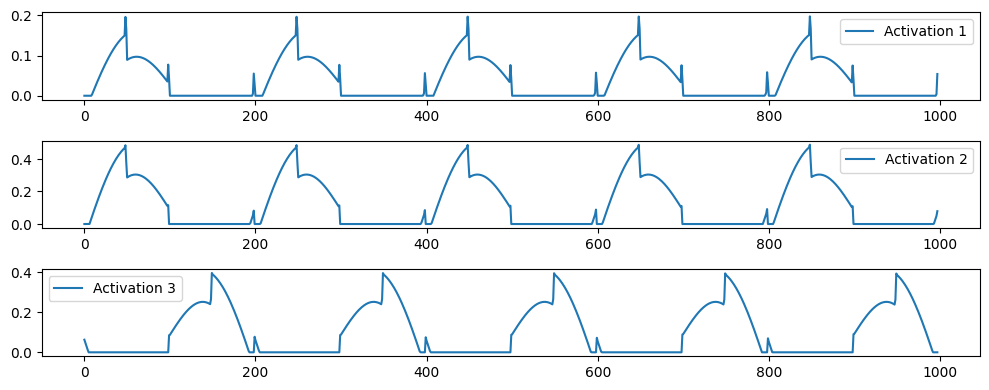

In [76]:
# ✅ Загружаем новый ЭКГ-сигнал из CSV
ekg_new = pd.read_csv("ekg_signal.csv")["EKG Signal"].values  # Берём только столбец сигнала
ekg_new = ekg_new.reshape(1, 1000, 1)  # Приводим к форме для CNN [batch, time_steps, channels]


# Получаем активации (результат работы фильтров)
conv_output_new = conv_layer_model.predict(ekg_new)

# Визуализация результата
plt.figure(figsize=(10, 4))
for i in range(3):  # Первые 3 фильтра
    plt.subplot(3, 1, i+1)
    plt.plot(conv_output_new[0, :, i], label=f"Activation {i+1}")
    plt.legend()
plt.tight_layout()
plt.show()

In [77]:
# Добавляем слои после свёрточного слоя
model.add(Dense(32, activation="relu"))  # Новый плотный слой
model.add(Dense(1, activation="sigmoid"))  # Выход (0 = норм, 1 = аритмия)

# Компиляция модели
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Обучаем на размеченных данных
model.fit(X_train, Y_train, epochs=30, batch_size=16, validation_data=(X_test, Y_test))

NameError: name 'X_test' is not defined

In [ ]:
# Создаём автоэнкодер
autoencoder = Sequential([
    Conv1D(16, kernel_size=5, activation="relu", padding="same", input_shape=(1000, 1)),
    Conv1D(8, kernel_size=5, activation="relu", padding="same"),
    Conv1D(16, kernel_size=5, activation="relu", padding="same"),
    Conv1D(1, kernel_size=5, activation="sigmoid", padding="same")  # Восстанавливаем сигнал
])

# Компиляция
autoencoder.compile(optimizer="adam", loss="mse")

# Обучение
autoencoder.fit(X_train, X_train, epochs=50, batch_size=16, validation_split=0.2)

# Выявление аномалий
X_pred = autoencoder.predict(X_test)
mse = np.mean(np.abs(X_pred - X_test), axis=1)
threshold = np.percentile(mse, 95)  # 95% доверительный интервал
anomalies = mse > threshold